In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
import latexify as lt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


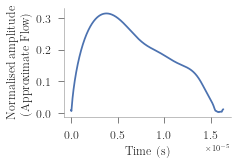

In [11]:
#generating more figures for the paper
lt.latexify(columns=1, fig_height=2, fig_width=3)
figname = "pipeline-figure/pipeline-6"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
fs=16000
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:]
t = np.arange(0,len(x))/fs


axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

ax = plt.subplot(1,1,1)
ax.plot(estdVolume,envelope_hat_filt)
#ax.plot(estdVolume,envelope_hat_filt)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Normalised amplitude\n (Approximate Flow)', fontsize=12)

ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

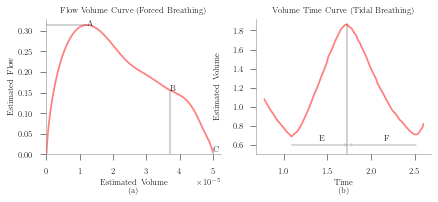

In [135]:
# temp code for generating a key image for the paper.

lt.latexify(columns=2, fig_height=2.5)
figname = "fb-tb-main"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
fs = 16000
#fig, ax = plt.subplots(nrows=1, ncols=1)
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
t = np.arange(0,len(x))/fs
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)




ax = plt.subplot(1,2,1)
ax.plot(estdVolume, envelope_hat_filt, color='red', alpha=0.5)
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xlabel('Estimated Volume\n (a)')
ax.set_ylabel('Estimated Flow')
ax.set_title('Flow Volume Curve (Forced Breathing)')
PEFannotateX = estdVolume[np.where(envelope_hat_filt == np.max(envelope_hat_filt))[0][0]]
PEFannotateY = np.max(envelope_hat_filt)
ax.annotate('A', xy =(PEFannotateX, PEFannotateY), xytext =(PEFannotateX, PEFannotateY))
ax.hlines(PEFannotateY, 0, PEFannotateX, colors='k', linestyles='solid', label='', alpha=0.2)
FEVannotateX = estdVolume[16000]
FEVannotateY = envelope_hat_filt[16000]
ax.annotate('B', xy =(FEVannotateX, FEVannotateY), xytext =(FEVannotateX, FEVannotateY))
ax.vlines(FEVannotateX, 0, FEVannotateY, colors='k', linestyles='solid', alpha=0.2)
FVCannotateX = estdVolume[-1]
FVCannotateY = envelope_hat_filt[-1]
ax.annotate('C', xy =(FVCannotateX, FVCannotateY), xytext =(FVCannotateX, FVCannotateY))
ax.vlines(FVCannotateX, 0, FVCannotateY, colors='k', linestyles='solid', alpha=0.2)
  
lt.format_axes(ax)

ax = plt.subplot(1,2,2)
x2 = pd.read_csv('sample-tidal.csv')
ax.plot(x2['X'], x2['Y'],color='red',alpha=0.5)
ax.set_ylim(0.5,)
ax.set_ylabel('Estimated Volume\n')
ax.set_xlabel('Time\n (b)')
ax.set_title('Volume Time Curve (Tidal Breathing)')



ax.arrow(1.08782718105938, 0.6, 0.60476226762, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.vlines(1.7225894486877298, 0, 1.86549823672225, colors='k', linestyles='solid', alpha=0.2)
ax.annotate('E', xy =(1.40520831487,0.65), xytext =(1.40520831487, 0.65))

ax.arrow(2.5151783657339304, 0.6, -0.73258891704, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.annotate('F', xy =(2.15,0.65), xytext =(2.15, 0.65))



lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

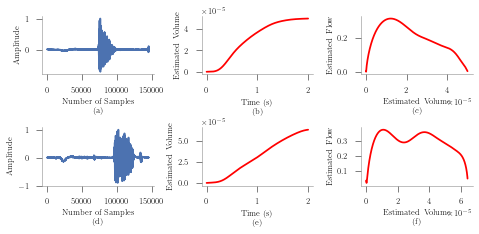

In [10]:
# temp code for generating a key image for the paper.
figname = "flowVSvolume"
lt.latexify(columns=2, fig_height=3)
fs = 16000
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
#print("Reading:", file)
fig, ax = plt.subplots(2,3)

x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[0,0].plot(x)
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Number of Samples\n (a)')

lt.format_axes(ax[0,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[0,1].plot(t,estdVolume, color='red')
ax[0,1].set_ylabel('Estimated Volume')
ax[0,1].set_xlabel('Time (s)\n (b)')
lt.format_axes(ax[0,1])


ax[0,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[0,2].set_xlabel('Estimated Volume\n (c)')
ax[0,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[0,2])
fig.tight_layout()

######################################################################
######################################################################
######################################################################
######################################################################

file = "012_FVC_Cloth_2.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[1,0].plot(x)
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Number of Samples\n (d)')

lt.format_axes(ax[1,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[1,1].plot(t,estdVolume, color='red')
ax[1,1].set_ylabel('Estimated Volume')
ax[1,1].set_xlabel('Time (s)\n (e)')
lt.format_axes(ax[1,1])


ax[1,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[1,2].set_xlabel('Estimated Volume\n (f)')
ax[1,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[1,2])



plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

In [29]:
import os
mypath="n95data/"
(_, _, filenames) = next(os.walk(mypath))

Reading: 005_FVC_N95_1.json
SNR= 0.03337192557680606
Raw PEF =  5.836110023583247
Raw FEV1 =  3.567338090010169
Raw FVC =  5.525003168385125
Ratio% =  64.56716822214689





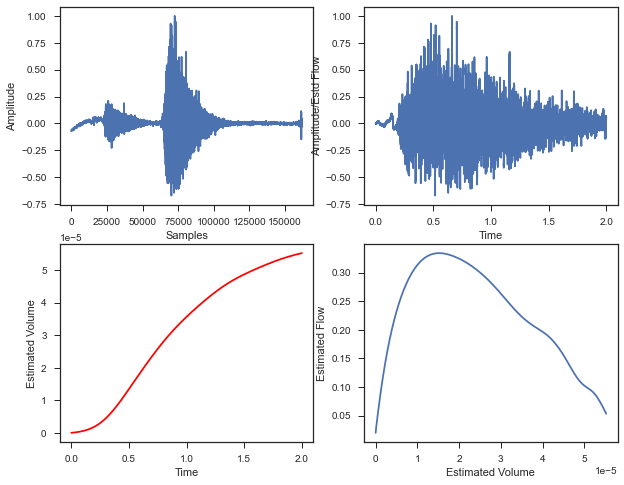

Reading: 005_FVC_N95_2.json
SNR= 0.0042138372204429675
Raw PEF =  5.231872135835436
Raw FEV1 =  3.4334214711342765
Raw FVC =  5.839138852527439
Ratio% =  58.80013402401176





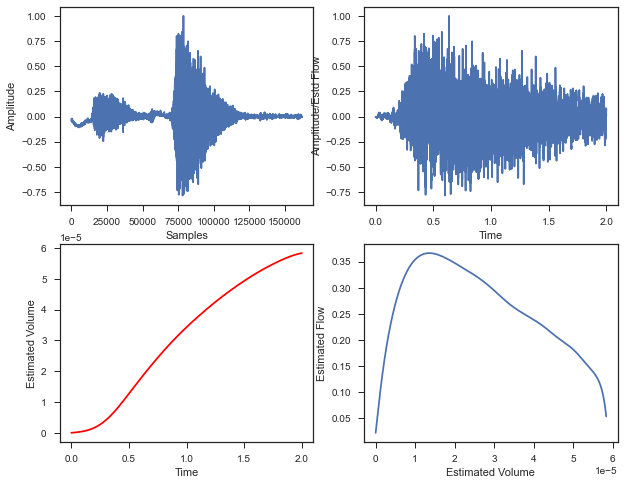

Reading: 006_FVC_N95_1.json
SNR= 0.017449047586590577
Raw PEF =  5.296566855283106
Raw FEV1 =  3.4621964169434842
Raw FVC =  5.78992406784686
Ratio% =  59.796922660351846





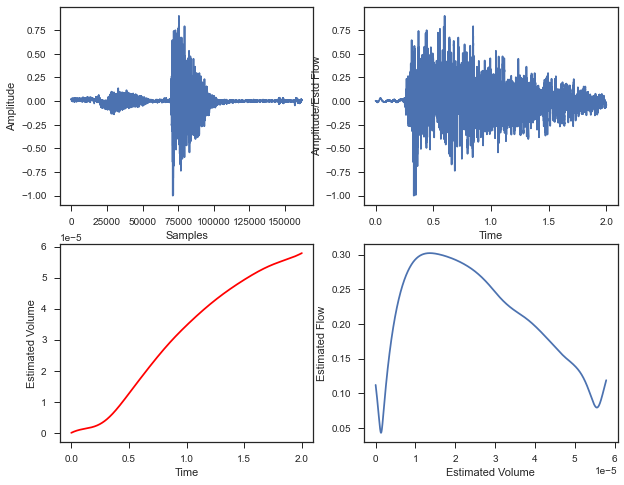

Reading: 006_FVC_N95_2.json
SNR= 0.024169181177825592
Raw PEF =  5.307846978838126
Raw FEV1 =  3.2427678342552118
Raw FVC =  6.003410508710416
Ratio% =  54.01542722341315





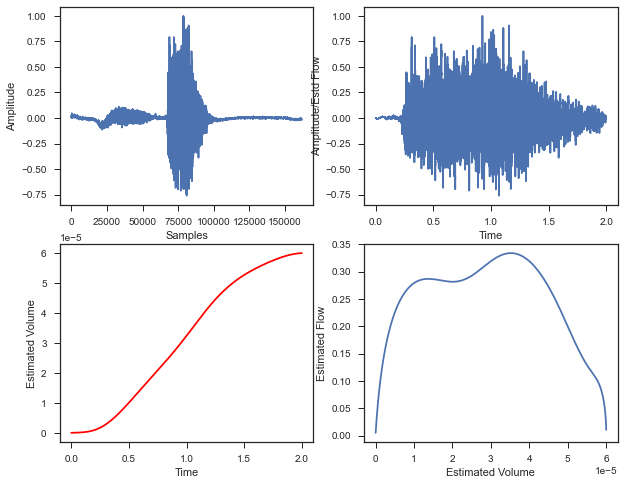

Reading: 008_FVC_N95_1.json
SNR= 0.013288105670584239
Raw PEF =  8.808330447073843
Raw FEV1 =  4.056338974972603
Raw FVC =  5.079923576634154
Ratio% =  79.8503936876201





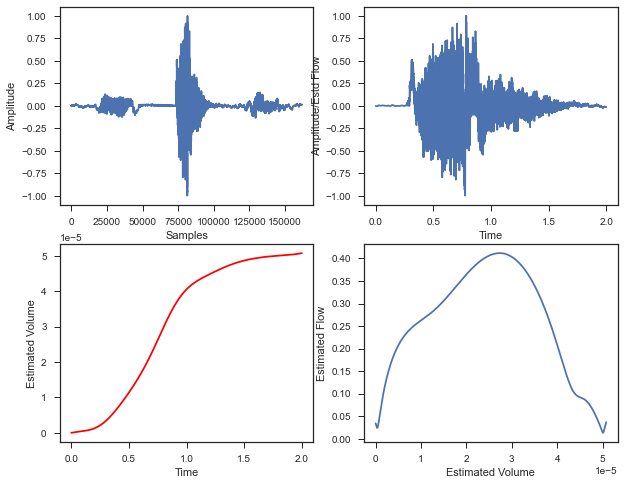

Reading: 008_FVC_N95_2.json
SNR= 0.023786213712324856
Raw PEF =  6.9383668934170935
Raw FEV1 =  3.9305360225330817
Raw FVC =  4.891090085787811
Ratio% =  80.3611455441019





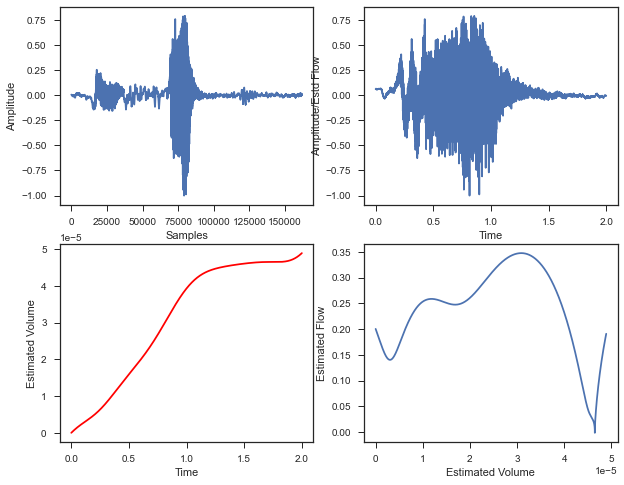

Reading: 009_FVC_N95_1.json
SNR= 0.009899189224714285
Raw PEF =  4.3504401890098565
Raw FEV1 =  3.2367591547955032
Raw FVC =  5.926897474020281
Ratio% =  54.611357273908986





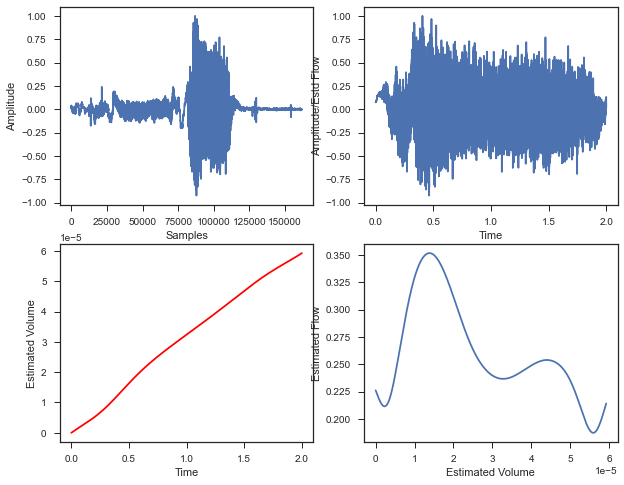

Reading: 010_FVC_N95_1.json
SNR= 0.03942647978654811
Raw PEF =  5.335368043862735
Raw FEV1 =  3.4895164555268576
Raw FVC =  5.497970151963164
Ratio% =  63.469177879782656





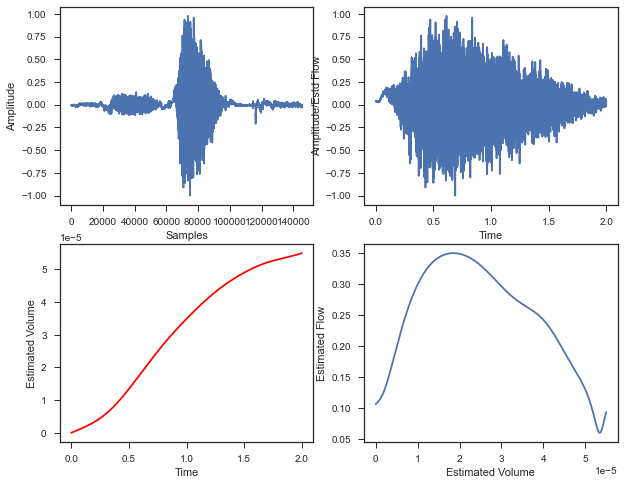

Reading: 010_FVC_N95_2.json
SNR= 0.020511745262167164
Raw PEF =  6.251695665764711
Raw FEV1 =  3.563483230850123
Raw FVC =  5.022241578492088
Ratio% =  70.9540386529962





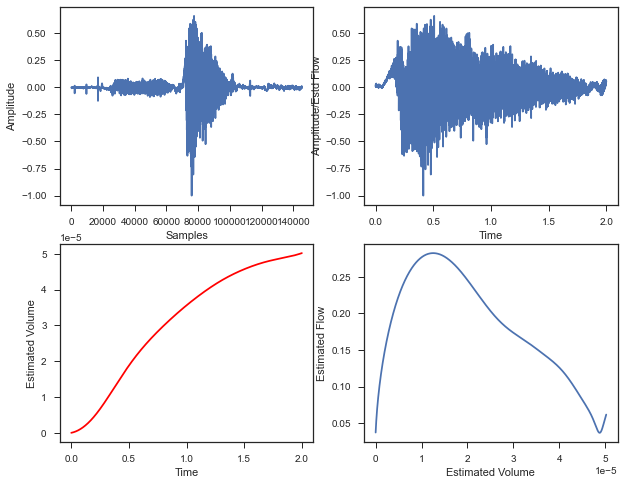

Reading: 012_FVC_N95_1.json
SNR= 0.025835127035700976
Raw PEF =  9.966665311806278
Raw FEV1 =  4.013352230789311
Raw FVC =  4.611960968233469
Ratio% =  87.02051596777834





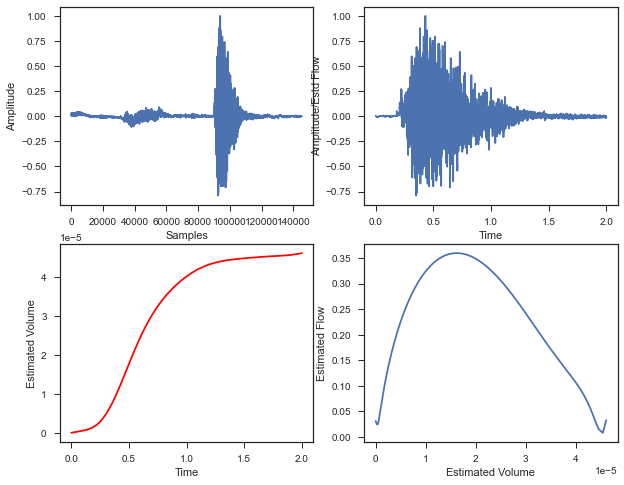

Reading: 012_FVC_N95_2.json
SNR= 0.01660986097627904
Raw PEF =  11.172959525110967
Raw FEV1 =  3.982649407874831
Raw FVC =  4.4419323278929586
Ratio% =  89.66029002436447





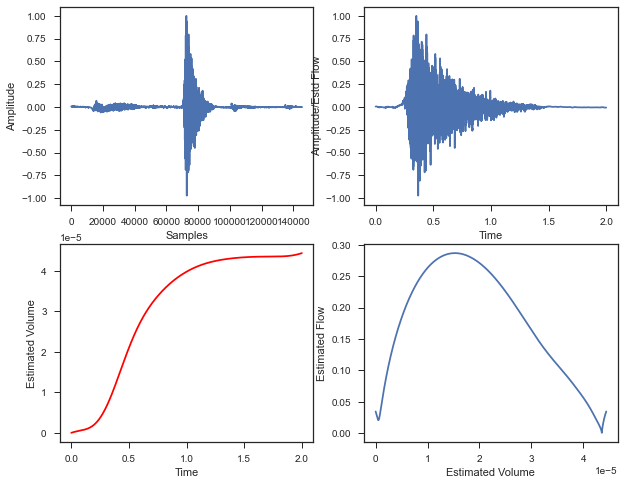

Reading: 013_FVC_N95_1.json
SNR= 0.0172845159784411
Raw PEF =  9.635689401997094
Raw FEV1 =  4.251175840443272
Raw FVC =  4.718502062298014
Ratio% =  90.09587755426044





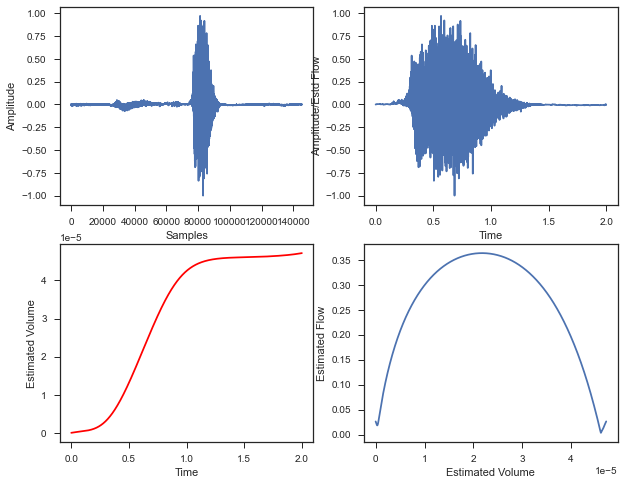

Reading: 013_FVC_N95_2.json
SNR= 0.005724207431320154
Raw PEF =  13.331537902746406
Raw FEV1 =  4.035658076761118
Raw FVC =  4.373827174130805
Ratio% =  92.26834797291939





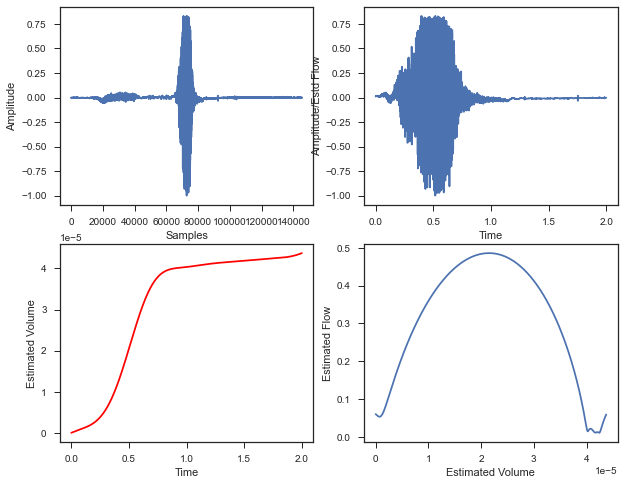

Reading: 014_FVC_N95_1.json
SNR= 0.023006154360425968
Raw PEF =  7.215194131175164
Raw FEV1 =  3.7140796425822784
Raw FVC =  4.9338982258221
Ratio% =  75.2767785752903





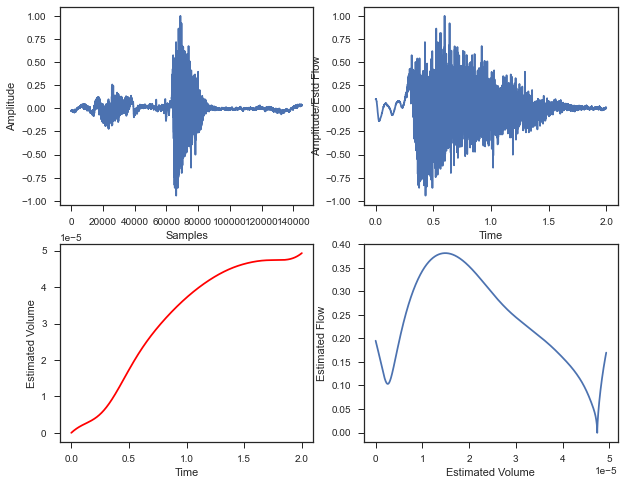

Reading: 014_FVC_N95_2.json
SNR= 0.023675799334435952
Raw PEF =  10.224617635964675
Raw FEV1 =  4.050070836655474
Raw FVC =  4.432582333855963
Ratio% =  91.37045928557546





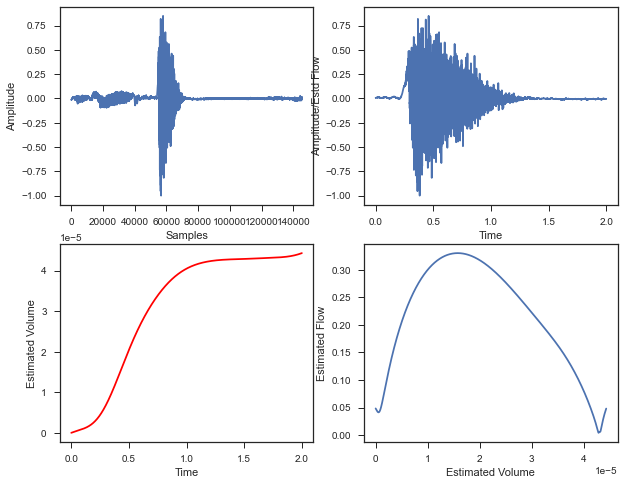

Reading: 016_FVC_N95_1.json
SNR= -0.03972851243391408
Raw PEF =  6.0452781572127545
Raw FEV1 =  3.8817274397157053
Raw FVC =  5.624749276906364
Ratio% =  69.01156386921964





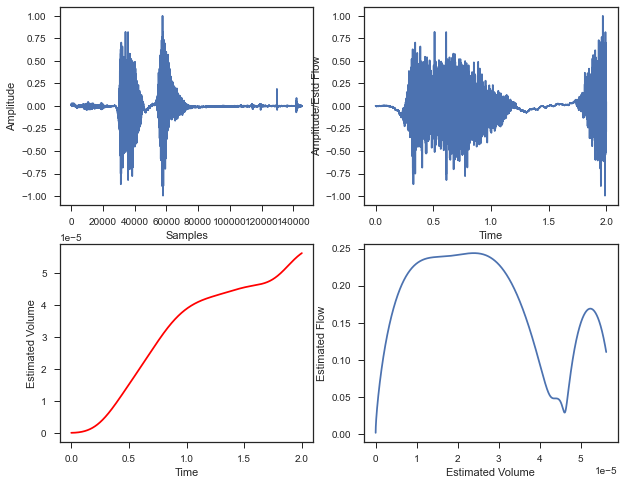

Reading: 017_FVC_N95_2.json
SNR= -0.0012975412168630433
Raw PEF =  11.832133021792137
Raw FEV1 =  4.001929774580667
Raw FVC =  4.7276161220822415
Ratio% =  84.65005768738364





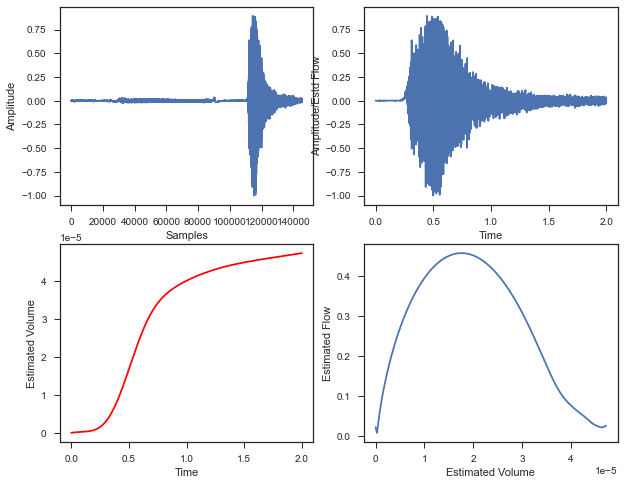

Reading: 018_FVC_N95_1.json
SNR= 0.01550163951014561
Raw PEF =  6.316059309410277
Raw FEV1 =  3.5296848011257627
Raw FVC =  5.965355005413335
Ratio% =  59.16973588198366





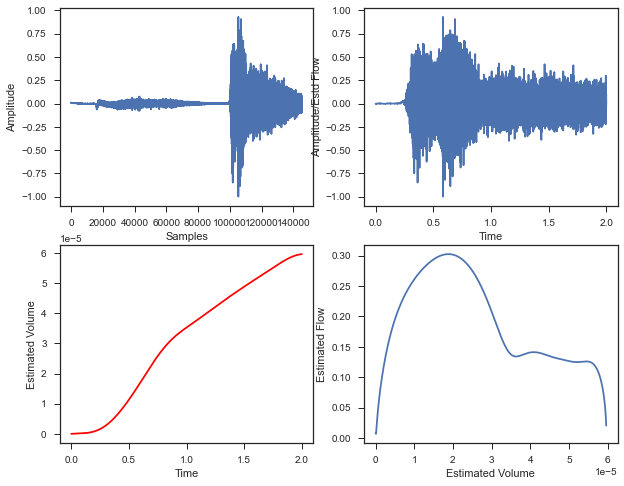

Reading: 018_FVC_N95_2.json
SNR= 0.019491837640939726
Raw PEF =  6.399613170758714
Raw FEV1 =  3.5488931090454656
Raw FVC =  6.034852813047992
Ratio% =  58.80662244773198





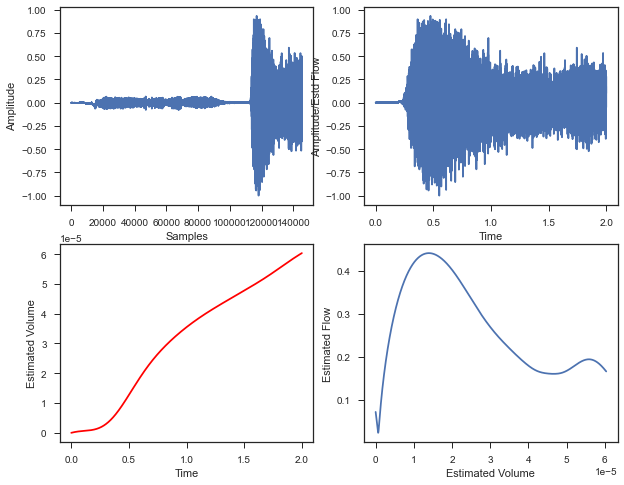

Reading: 019_FVC_N95_1.json
SNR= 0.003411407792769641
Raw PEF =  13.081181287512704
Raw FEV1 =  4.024365700912452
Raw FVC =  4.468814031274852
Ratio% =  90.0544456034209





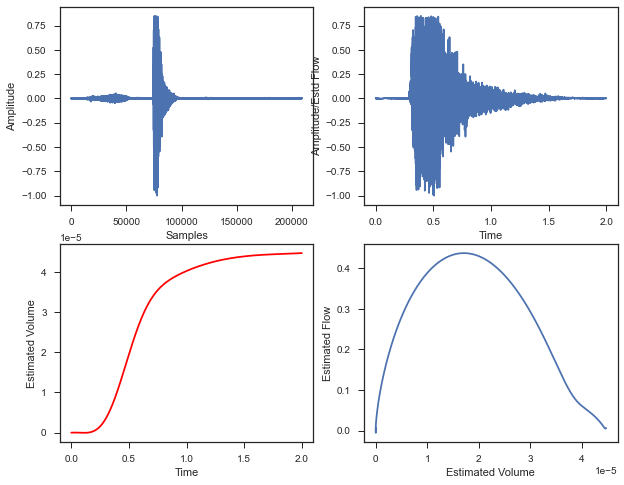

Reading: 020_FVC_N95_1.json
SNR= 0.00363244741423979
Raw PEF =  13.786645614584017
Raw FEV1 =  4.189450864856088
Raw FVC =  4.3996821879653245
Ratio% =  95.22167024508514





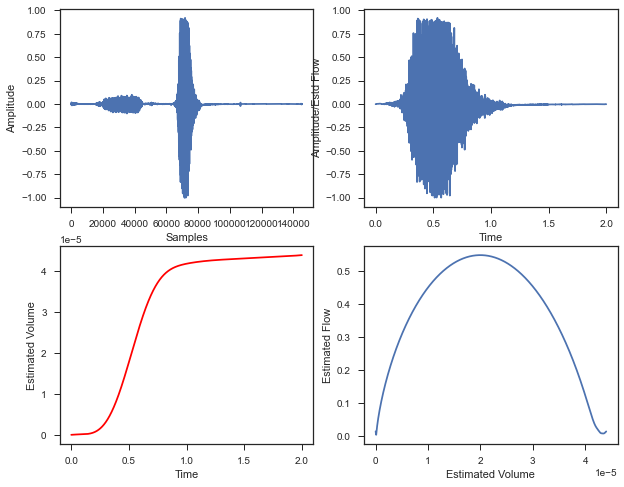

Reading: 020_FVC_N95_2.json
SNR= -0.0017970363118478053
Raw PEF =  12.961262706182383
Raw FEV1 =  3.9288885921152965
Raw FVC =  4.126112536262716
Ratio% =  95.22010264106713





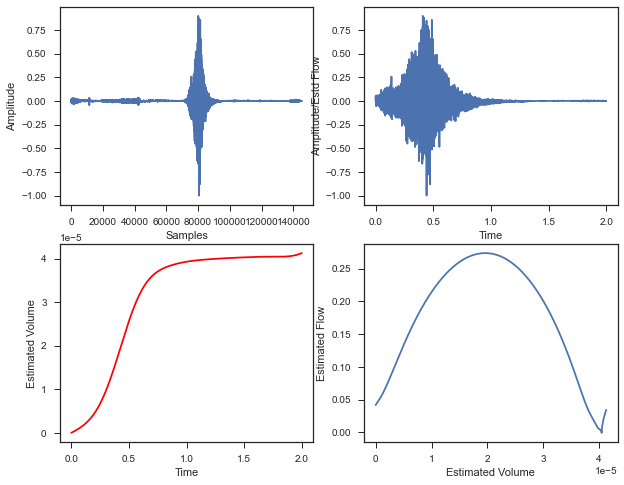

Reading: Anubhav_FVC_N95Mask_1.json
SNR= 0.019988327165949355
Raw PEF =  8.46692703507382
Raw FEV1 =  4.008080171368563
Raw FVC =  4.830588732159739
Ratio% =  82.9729126945685





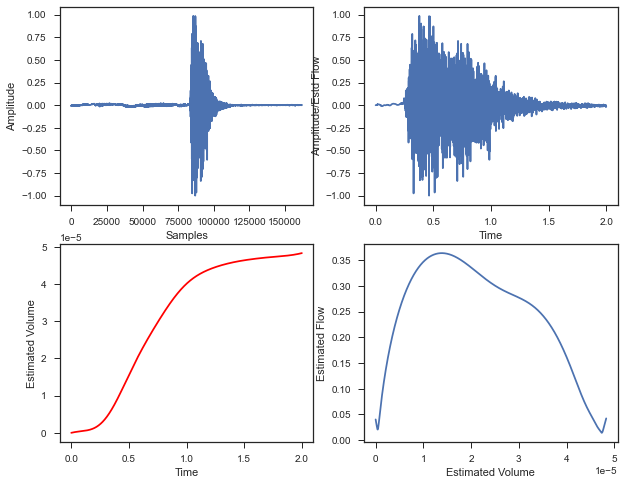

Reading: Anubhav_FVC_N95Mask_2.json
SNR= 0.004794085168467683
Raw PEF =  10.287903294721888
Raw FEV1 =  4.0392540640600565
Raw FVC =  4.71274158682413
Ratio% =  85.70922019898124





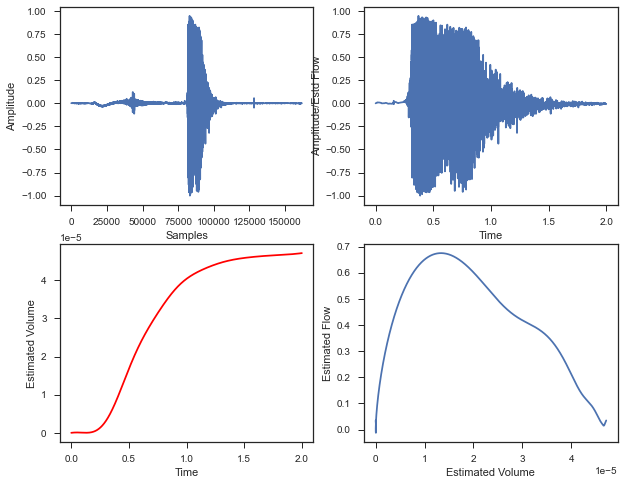

Reading: Raviraj_FVC_N95_2.json
SNR= 0.017215978275865376
Raw PEF =  6.903535694167561
Raw FEV1 =  3.7009778432055644
Raw FVC =  5.077383303919464
Ratio% =  72.89144076139792





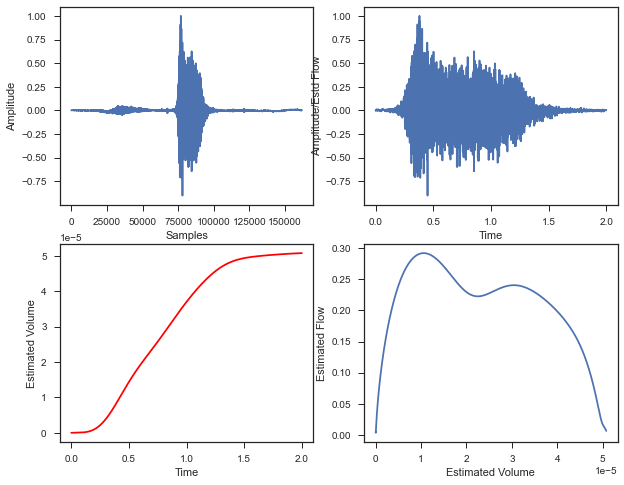

Reading: Rishiraj_FVC_N95Mask_1.json
SNR= 0.02916540827459102
Raw PEF =  10.031958076910664
Raw FEV1 =  3.7392420538152766
Raw FVC =  4.750905524926052
Ratio% =  78.705881104076





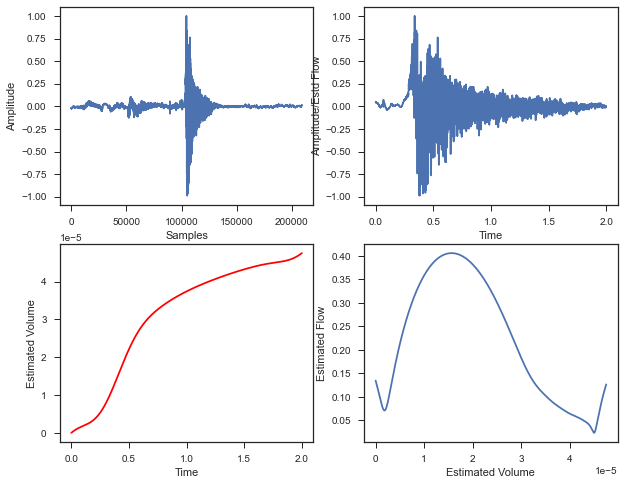

Reading: Rishiraj_FVC_N95Mask_2.json
SNR= 0.03985873801326929
Raw PEF =  9.76282362298753
Raw FEV1 =  3.648611225855645
Raw FVC =  4.83812285980658
Ratio% =  75.41377785518887





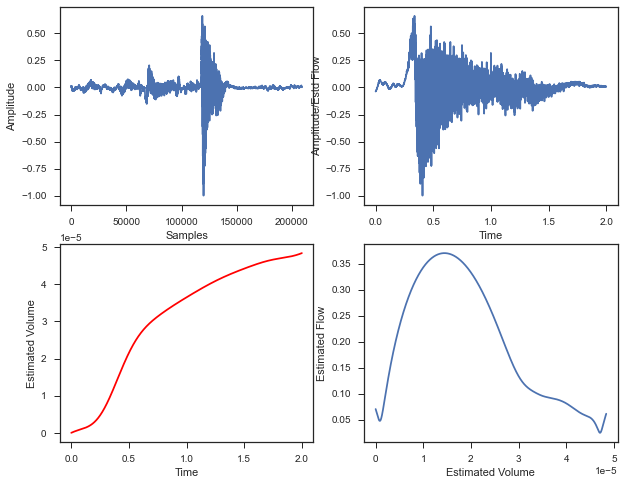

Reading: Rohit_FVC_N95Mask_1.json
SNR= 0.01418384544176531
Raw PEF =  6.854528515931932
Raw FEV1 =  3.783453512320466
Raw FVC =  4.892283583341335
Ratio% =  77.33512270636692





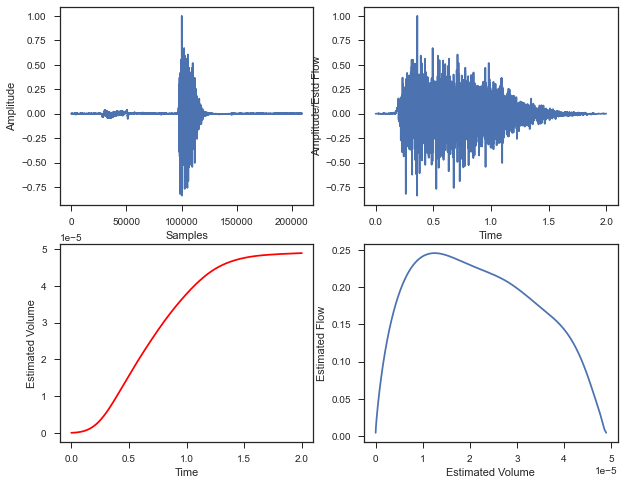

Reading: Rohit_FVC_N95Mask_2.json
SNR= 0.015839972155868264
Raw PEF =  9.45951144974812
Raw FEV1 =  4.027991765497691
Raw FVC =  4.704918684811315
Ratio% =  85.61235667050065





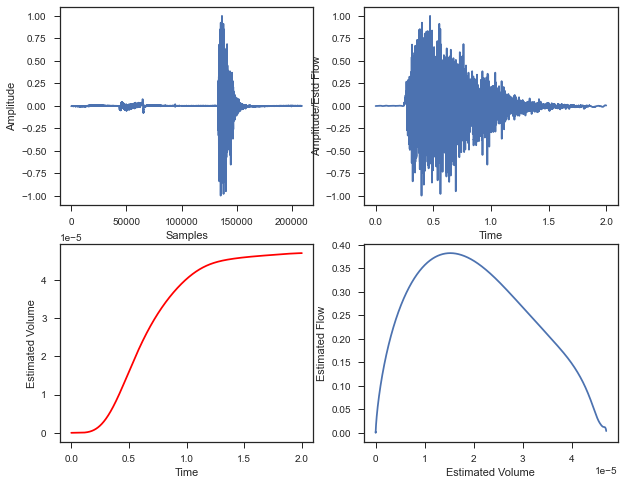

"\n#save the data\nrPFT = pd.DataFrame(\n    {'Filename': fileList,\n     'rPEF': rPEF,\n     'rFEV1': rFEV1,\n     'rFVC': rFVC\n    })\n"

In [32]:
polynomialCoef = []

rPEF = []
rFEV1 = []
rFVC = []
fileList = []

for file in filenames:
    fs = 16000
    print("Reading:", file)
    fileList.append(file)
    fig = plt.subplots(figsize=(10,8))
    x = pd.read_json(mypath+file, orient='keys')['payload']['values']
    x = x/np.max(np.abs(x))
    plt.subplot(2, 2, 1)
    plt.plot(x)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    
    #sampling rate is 16Khz
    
    
    #detect the starting point of FVC
    fvcStartIndex = np.where(x>=0.50)
    #move back x second from the point FVC started and go till y seconds
    x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
    print("SNR=", x.mean()/x.std())
    t = np.arange(0,len(x))/fs
    
    plt.subplot(2, 2, 2)
    plt.plot(t,x)
    plt.ylabel('Amplitude/Estd Flow')
    plt.xlabel('Time')
    

    # get analytic signal
    ax = signal.hilbert(x)
    envelope_hat = np.abs(ax)
    #filter the Hilbert envelope
    nyq_rate = fs /0.5
    width = 1.0/nyq_rate # 5 Hz filter transition width.
    ripple_db = 10.0 # stop band attenuation
    fL_hz = 10
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

    envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
    
    #Corresponds to PEF
    rPEF.append(100000*envelope_hat_filt_normalized.max())
    print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
    
    #take cumsum of flow and then normalize
    estdVolume = np.cumsum(envelope_hat_filt)
    estdVolume = estdVolume/np.sum(estdVolume)
    
    #FEV1 Estimate
    rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
    print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
    
    plt.subplot(2, 2, 3)
    plt.plot(t,estdVolume,color='red',label='Estimated Volume')
    plt.ylabel('Estimated Volume')
    plt.xlabel('Time')
    
    #FVC Estimate
    rFVC.append(100000*estdVolume[-1])
    print("Raw FVC = ",100000*estdVolume[-1])
    print("Ratio% = ", (100000*estdVolume[np.where(t==1)[0][0]])/(100000*estdVolume[-1])*100)
    print("\n\n")
    
    
    plt.subplot(2, 2, 4)
    plt.plot(estdVolume, envelope_hat_filt)
    plt.xlabel('Estimated Volume')
    plt.ylabel('Estimated Flow')
    pd.DataFrame({'Volume':estdVolume, 'Flow':envelope_hat_filt}).to_csv('approx-flow-volume-data/n95Mask/'+file+'.csv')
    
    
    plt.show()
    #break;
    
'''
#save the data
rPFT = pd.DataFrame(
    {'Filename': fileList,
     'rPEF': rPEF,
     'rFEV1': rFEV1,
     'rFVC': rFVC
    })
'''

In [23]:
file

'005_FVC_Cloth_1.json'

In [87]:
fs*3

132300

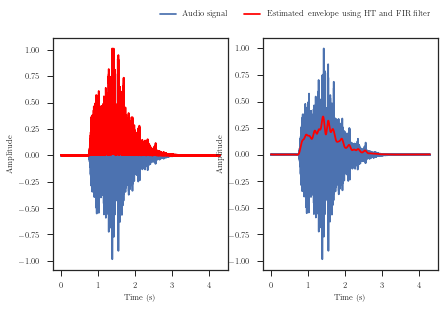

In [92]:
figname = 'audio-envelope'
lt.latexify(columns=2)
[fs, x] = wavfile.read("audioData/FVC-1.wav")
x = x/np.max(np.abs(x))
x = x[132300:]
t = np.arange(0,len(x))/fs
# get analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
#filter the Hilbert envelope
nyq_rate = fs / 2.0
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#lt.format_axes(ax)

ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat,color='red',label='Estimated envelope using HT')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated envelope using HT and FIR filter')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.,1.15])

#lt.format_axes(ax)

#plt.savefig(figname+'.pdf', bbox_inches='tight')

# plt.xlim(0,0.5)
#plt.ylim(-1,1.5)
plt.show()

In [35]:
#Corresponds to PEF
envelope_hat_filt.max()

0.4487636776600239

In [36]:
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

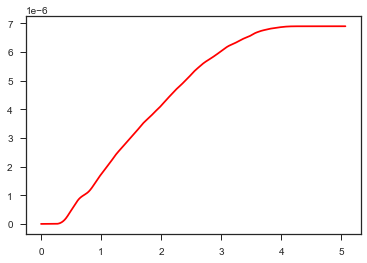

In [37]:
plt.plot(t,estdVolume,color='red',label='Estimated Volume')

In [38]:
#FEV1 Estimate
estdVolume[np.where(t==1)[0][0]]

1.731395981916569e-06

In [46]:
#FVC Estimate
estdVolume[-1]

6.9036928228316145e-06

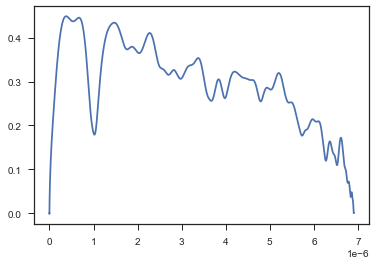

In [40]:
#estimated flow volume curve | Both y-axis and x-axis are normalized between 0 and 1
len(estdVolume) == len(envelope_hat_filt)
plt.plot(estdVolume, envelope_hat_filt)

In [12]:
import latexify as lt

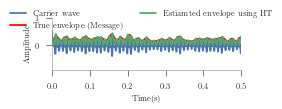

In [51]:
# envelope with no kaiser window
figname="am-carrier"
lt.latexify()
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
# plt.plot(x)
#fig = plt.subplots(figsize=(16,8))
ax = plt.subplot(2,1,1)
ax.plot(t,x,label='Carrier wave')
ax.plot(t,envelope,color='red', label='True envelope (Message)')
ax.plot(t,envelope_hat,label='Estiamted envelope using HT')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.2,1.3])
#ax.legend(bbox_to_anchor=[0.43,1.],ncol=3)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)
#ax.grid(True)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.9,1.)
lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

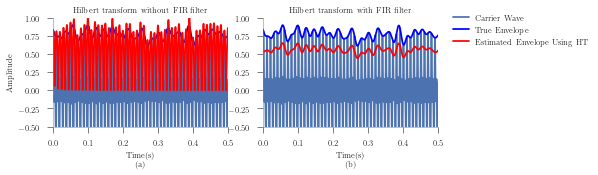

In [139]:
figname="am-carrier"
lt.latexify(columns=2, fig_height=2)
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#fig = plt.subplots(figsize=(16,4))
ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform without FIR filter')
ax.set_xlabel('Time(s)\n (a)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform with FIR filter')
ax.set_xlabel('Time(s)\n (b)')
#ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=1, bbox_to_anchor=[1.9,1.1])
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)


plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

plt.savefig(figname+'.pdf', bbox_inches='tight')

plt.show()

In [137]:
def create_envelope(num_samples,fL_hz=100,N=1000,beta=3):
    # we will create the envelope by low pass filtering white noise
    mean = 0
    std = 1
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    x = np.random.normal(mean, std, size=num_samples)
    x = signal.filtfilt(taps, 1,x)
    x = (x-np.min(x))
    x = x/np.max(x)
    return x
def create_carrier_harmonic(fs=8e3,fc=200,num_samples=1000,ncomps=1):
    # this will create a harmonic carrier with ncomps harmonics
    x = []
    for i in range(ncomps):
        x.append(np.sin(2*np.pi*(i+1)*fc*np.arange(0,num_samples,1)/fs))
    x = sum(x)
    x = x/np.max(np.abs(x))
    return x
def create_carrier_noise(mean=0,std=1,num_samples=1000):
    # this will create a white noise carrier
    x = np.random.normal(mean, std, size=num_samples)
    x = x/np.abs(x)
    return x